##### Getting MNIST can be tricky - this assumes sklearn version < 0.20, dowloading MNIST can take some time

In [2]:
from six.moves import urllib
from sklearn.datasets import fetch_mldata
try:
    mnist = fetch_mldata('MNIST original')
except (urllib.error.HTTPError, TimeoutError) as ex:
    print("Could not download MNIST data from mldata.org, trying alternative...")

    # Alternative method to load MNIST, if mldata.org is down
    from scipy.io import loadmat
    mnist_alternative_url = "https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat"
    mnist_path = "./mnist-original.mat"
    response = urllib.request.urlopen(mnist_alternative_url)
    with open(mnist_path, "wb") as f:
        content = response.read()
        f.write(content)
    mnist_raw = loadmat(mnist_path)
    mnist = {
        "data": mnist_raw["data"].T,
        "target": mnist_raw["label"][0],
        "COL_NAMES": ["label", "data"],
        "DESCR": "mldata.org dataset: mnist-original",
    }
    print("Success!")

Could not download MNIST data from mldata.org, trying alternative...
Success!


##### If you got success, load the nptsne module and run TextureTsne

In [6]:
%matplotlib inline
import numpy as np
import nptsne
import matplotlib.pyplot as plt

tsne = nptsne.TextureTsne(True)
embedding = tsne.fit_transform(mnist['data'])


ValueError: cannot reshape array of size 140000 into shape (1000,2)

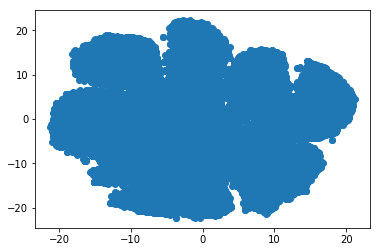

In [7]:
xyembed = embedding.reshape((70000,2))
plt.scatter(xyembed[...,0], xyembed[...,1])
plt.show()